# Demonstrate coronal ionization equiliblium

use modules in ~\Python\spectra\src\
<br>
ref.: https://github.com/kouui/spectra
<br>
2019          kou  initial writing<br>
2020.4.28     k.i.
2020.6.12

In [4]:
#---------------------------------------------------------------------
# setup Python environments
#---------------------------------------------------------------------
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 16px; }</style>"))
sys.path.append("../")
from src import Constants as Cst

Many of you may believe that

<br><br>
<center>Solar Corona &rarr; high temperature &rarr; LTE (thermodynamic equilibrium</center>
<br><br>

Is it TRUE ?

<br><br>
<br><br>

from <u> H&M 2014" section 9.1 </u>

Local thermodynamic equilibrium (LTE) or thermal equilibrium (TE) is characterized by the following three equilibrium distributions:

- Boltzmann excitation equation

$$
\frac{n_i}{N_I} = \frac{g_i}{U_I} e^{-E_i/kT}
$$

where $n_i$ is the population of level i, $g_i$ is its statistical weight, and $E_i$ is the level energy measured from the ground state; $N_I$ and $U_I$ are the total number density and the partition function of the ionization stage I to which level i belongs.
    
- Saha ionization equation

$$
\frac{N_{I+1}}{N_I} = \frac{2}{n_e} \frac{U_{I+1}}{U_I} (\frac{2\pi m_e kT}{h^2})^{3/2} e^{-\chi_I/kT}
$$

where $\chi_I$ is the ionization potential of ion at stage I

- Maxwellian velocity distribution of particles

$$
f(v)dv = (m/2\pi kT)^{3/2} exp(-mv^2/2kT) 4\pi v^2dv
$$

# Saha's ionization equilibrium

physics constant in C.G.S :

In [7]:
c = 2.99792458 * 1E10        # speed of light, cm/s
e = 4.80320427 * 1E-10       # elementary charge, cm3/2 * g1/2 * s−1
h = 6.62606885 * 1E-27       # planck constant, erg*s
m_e = 9.10938215 * 1E-28     # mass of electron, g
k_B = 1.3806504 * 1E-16      # Boltzmann constant, erg/K

ionization energy from "I&rarr;II" to "XVII&rarr;XVIII" (18 ionization stage with 17 ioniozation energy)

reference : [https://en.wikipedia.org/wiki/Molar_ionization_energies_of_the_elements](https://en.wikipedia.org/wiki/Molar_ionization_energies_of_the_elements)

in unit of eV

length of ionization energy array :  26


(26, 27, 26)

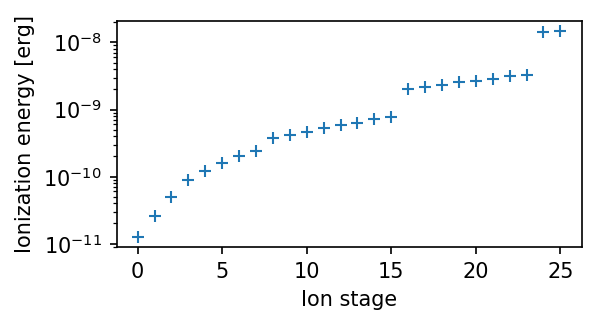

In [29]:
#--------------------------------------------------------------------------------
# ionization energy of Fe_I, II,,,, XVII in erg
#  https://en.wikipedia.org/wiki/Ionization_energies_of_the_elements_(data_page)
#--------------------------------------------------------------------------------
chi_eV = np.array([7.9024, 16.1878, 30.652, 54.8, 75.0, 99.1, 124.98, 151.06, 233.6, 262.1, 
                 290.2, 330.8, 361.0, 392.2, 457, 489.256, 1266, 1358, 1456, 
                 1582, 1689, 1799, 1950, 2023, 8828, 9277.69])   # in eV
xticks = np.arange(2,28) #19)
xticklabels = ["I","II","III","IV","V","VI","VII","VIII","IX","X",
              "XI","XII","XIII","XIV","XV","XVI","XVII","XVIII",
              "XVIIII","XX","XXI","XXII","XXIII","XXIV","XXV","XXVI","XXVII"]
print("length of ionization energy array : ", len(chi_eV))
chi_erg = chi_eV * Cst.eV2erg_
fig, ax = plt.subplots(1,1, figsize=(4,2), dpi=150)
ax.plot(chi_erg,"+")
ax.set_yscale("log")
ax.set_ylabel("Ionization energy [erg]")
ax.set_xlabel("Ion stage")
len(chi_eV), len(xticklabels), len(xticks)

assuming all Iron ions are in its ground state, we have

$$
\frac{N_{I+1}}{N_I} = \frac{2}{n_e} (\frac{2\pi m_e kT}{h^2})^{3/2} e^{-\chi_I/kT}
$$

In [30]:
def sahasDensityRatio(chi, n_e, T):  # return Saha N(I+1)/N(I)
    
    numerator = 2 * (2*np.pi*m_e*k_B*T)**1.5
    denominator = n_e * h**3
    x = chi / (k_B*T)
    
    return numerator / denominator * np.exp(-x)

D:\Users\ichimoto\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


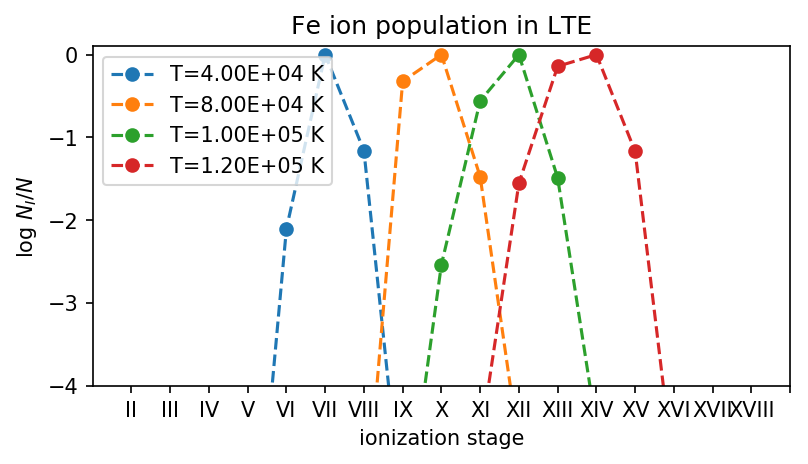

In [33]:
# Fe ionization in LTE
n_e = 1E8 # cm-3
fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=150)
for t in [4E4, 8E4, 1E5, 1.2E5]:
    sahar = sahasDensityRatio(chi_erg, n_e, t)
    N_I = sahar.cumprod()   # cumulative product
    N_I /= N_I.max()
    ax.plot(np.arange(2,19), np.log10(N_I[0:17]), "--o", label="T={0:1.2E} K".format(t))

ax.set_ylim(-4, 0.1)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels[1:18])
ax.set_ylabel("log $N_I/N$")
ax.set_xlabel("ionization stage")
ax.set_xlim(1,19)
plt.title("Fe ion population in LTE")
ax.legend(loc="upper left");

D:\Users\ichimoto\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


Text(0,1,'$T_e = $1.0e+05K')

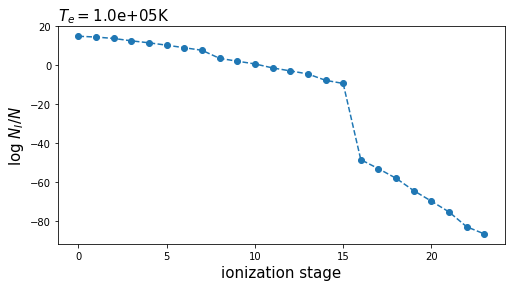

In [36]:
T = 1e5
sahar = sahasDensityRatio(chi_erg, n_e, T)
type(sahar) 
nn=len(sahar)
fig, ax = plt.subplots(1,1, figsize=(8,4))#, dpi=150)
ax.plot(np.arange(nn), np.log10(sahar),'--o')
ax.set_ylabel("log $N_I/N$",fontsize=15)
ax.set_xlabel("ionization stage",fontsize=15)
plt.title('$T_e = ${0:5.1e}K'.format(T),loc='left',fontsize=15)


to observe Fe X, Fe XI, Fe XIII and Fe XIV in Solar corona, $10^5 K$ is enough, which is **one order of magnatitude smaller than the observed $10^6 K$** (derived from corona emission line broadening)

<br><br>
**conclusion** :

the condition of the corona is far from the thermal equilibrium, because it is difficult to give an interpretation by the saha-like formula.

# TE v.s. LTE v.s. NLTE

### Thermodynamic equilibrium (TE)
    
<img src=https://www.electrical4u.com/images/march16/1461572485.gif>


### Local thermodynamic equilibrium (LTE)

the real atmosphere of stars will never be a enclosure system so TE will never hold. however, 
    
<img src="https://docs.google.com/drawings/d/e/2PACX-1vRu1RzfGJW69vofwWpTFquM1TS9CHYchaKnL1cq0LR91vjivqouAMsldFkU4E8zn_rjzkGg24-f5UUQ/pub?w=960&amp;h=320"></img>
    
for a given transition line, photon's mean free path is much smaller than the characteristic length scale

&rarr; radiation is strongly coupled to the local thermal pool

&rarr; **collisional transition > radiative transition**

then the three distributions under TE hold for that local location

### Non Local thermodynamic equilibrium (NLTE)

thus we may expect departures from LTE if the following two condisions are met :

1. radiatie rates in some important atomic transition dominate over the collisional rates
2. radiation does not have the local Planckian distribution

<br><br>
ok. now let's turn back to the ionization equilibrium of iron in Solar corona.

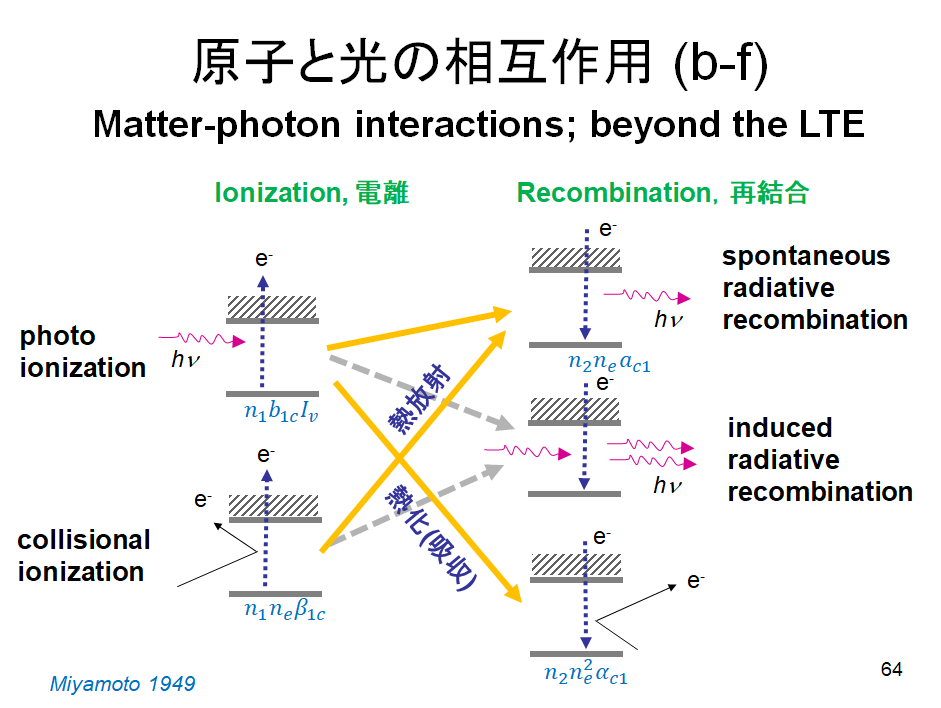

this kind of ionization is firstly presented by <u>Shotaro Miyamoto, 1949, *Ionization Theory of Solar Corona*</u>. 

<br><br>

from <u>R.Rutten 2003, (Eq3.13)</u>. the spontaneous recombination rate is: (comment on this formula)

$$
n_cR_{ci}^{spon} = 4\pi n_c [\frac{n_i}{n_c}]_{LTE} \int_{\nu_0}^{\infty} {\frac{\sigma_{ic}(\nu)}{h\nu} \frac{2h\nu^3}{c^2}e^{-h\nu/kT}d\nu}
$$

where according to saha's equation,

$$
[\frac{n_i}{n_c}]_{LTE} = \frac{n_e}{2} \frac{U_i}{U_c} (\frac{h^2}{2\pi m_e kT})^{3/2} e^{\chi_I/kT}
$$

and we use a rough approximation of hydrogen-like cross section $\sigma_{ic}$, (<u>H&M 2014 P187 Eq7.84</u>)

$$
\sigma_{ic} = \frac{64 \pi^4 Z^4 m_e e^{10} g_{bf}(n',\nu)}{3\sqrt{3}ch^6n'^5\nu^3}
$$

with the assumption of "all iron ions are in their ground state",

$$
U_c = U_i; \quad n'=1
$$

and if we further set

$$
g_{bf}(n',\nu) = 1
$$

we obtained a final expression for spontaneous recombination rate:

$$
spontaneous \; recombination \; rate = n_c n_e \alpha(T,\chi)
$$

where

$$
\alpha(T,\chi) = \frac{2^9 \pi^5}{(6\pi)^{3/2}} \frac{e^{10}}{m^{1/2}c^3h^3} \frac{Z^4}{(kT)^{3/2}} E(\frac{\chi}{kT})
$$

and $E(x)$ is an integral

$$
E(x) = e^x \int_{x}^{\infty}{\frac{e^{-t}}{t}dt}
$$

$\alpha(T,\chi)$ here is exactly the same with <u>S.Miyamoto, 1949, Eq2.5</u>

as to collisional ionization rate, we follow formula in <u>S.Miyamoto, 1949, Eq2.6</u> that

$$
collisional \; ionization \; rate = n_i n_e \beta(T, \chi)
$$

where 

$$
\beta(T, \chi) = \frac{4 \pi e^4 C_{nl}}{(2 \pi m_e kT)^{1/2} \chi} e^{-\chi/kT}; \quad C_{nl}=0.15
$$


## ■ ionization / recombination  (Miyamoto 1949)

Saha の式に従うと、$N_{I+1}/N_I \sim 1/n_e$,   
	 FeXIV 5303 / FeX 6374 ~ $n_e^{-4}$ 　=>  観測と矛盾（$n_e$は高さでexp.変化）

従ってコロナの電離は熱平衡ではない。

* spontaneous radiative recombination rate  =  $n_{i+1} n_e a_{21}(T,\chi)$

$
\qquad a_{21}(T,\chi) = \frac{2^9 \pi^5}{(6\pi)^{3/2}} \frac{e^{10}}{m^{1/2}c^3h^3} \frac{Z^4}{(kT)^{3/2}} E(\frac{\chi}{kT}),
$

$\qquad \qquad  E(x) = \int_{x}^{\infty}{\frac{e^{x-t}}{t}dt} 
\qquad $  for hydrogen-like ion 



$\qquad T$: electron temperature,  $T_r$: radiation temperature


* radiative ionization rate        = $n_i b_{12}(T_r,\chi)$

$
\qquad b_{12}(T_r,\chi)=G(T_r,\chi) a_{21}(T_r,\chi), \quad G(T_r,\chi) \equiv (\frac{2\pi m_e kT_r}{h^2})^{3/2} e^{-\chi/kT_r}
$

* collisional ionization rate        = $n_i n_e \beta_{12}(T,\chi)$

$
\qquad \beta_{12}(T, \chi) = \frac{4 \pi e^4 C_{nl}}{(2 \pi m_e kT)^{1/2} \chi} e^{-\chi/kT}; \quad C_{nl}=0.15 \qquad (H. Bethe)
$

* collisional recombination (tripple collision) rate  = $n_{i+1} n_e^2 \alpha_{21}(T,\chi)$

$
\qquad \alpha_{21}(T, \chi) = \frac {\beta_{12}(T_r,\chi)}{G(T_r,\chi)}
= \frac {h^3}{(2\pi m_e kT_r)^2} \frac{4 \pi e^4 C_{nl}}{\chi}
$



In [37]:
from scipy.integrate import quad

def integrand(t,x):
    return np.exp(x-t)/t

def E(x):
    return quad(integrand, x, np.inf, x)[0]
    

def E2(x):
    nn = np.size(x)
    if nn == 1:
        Es = quad(integrand, x, np.inf, x)[0]
    elif nn > 1:
        Es = np.zeros(nn)
        for i in range(0,nn):
            Es[i] = quad(integrand, x[i], np.inf, x)[0]
    return  Es


In [38]:
ev2erg = 1.60217662 * 1E-12  # eV --> erg
def a21(T,chi,Z):  # spontaneous recomb.coeff., T: electron temp., chi in eV

    assert isinstance(chi, np.ndarray)
    
    a1 = (2**9 * np.pi**5 * e**10 * Z**4)
    a2 = ((6*np.pi)**1.5 * m_e**0.5 * c**3 * h**3 *(k_B*T)**1.5)

    x = chi * ev2erg /(k_B * T)
    l = len(chi)
    integralResults = np.zeros(l)
    for i in range(l):
        integralResults[i] = E(x[i])

    a = a1/a2 * integralResults
    return a
    
def G(T,chi):
    
    return (2 * np.pi * m_e * k_B * T)**1.5 / h**3 * np.exp(-chi*ev2erg/k_B/T)

def bet12(T,chi):

    Cnl=0.15
    return (4 * np.pi * e**4 * Cnl)/(2 * np.pi * m_e * k_B * T)**0.5 /(chi * ev2erg) * np.exp(-chi*ev2erg/k_B/T)
    

D:\Users\ichimoto\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


Text(0,1,'$T_e = 10^6 K, n_e = 10^8 cm^{-3}$')

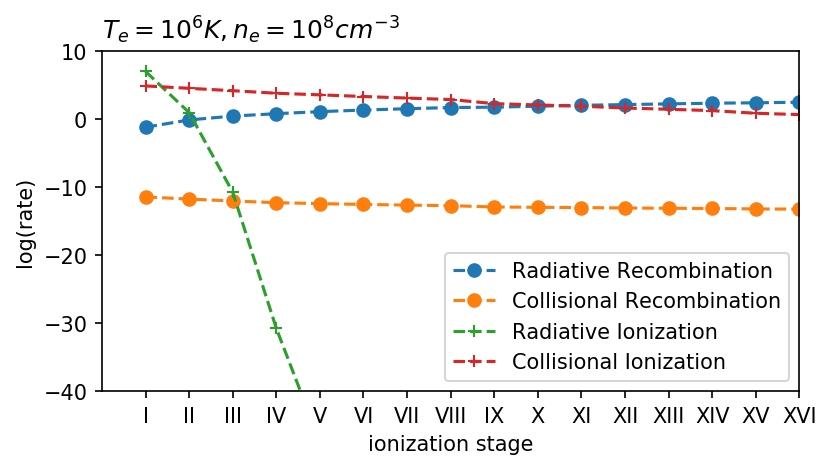

In [39]:
#  compare transition rate

Te=1E6  # electron temp., K
Tr=6000. # radiation temp.
chi=chi_eV[0:17]  # eV
nn=len(chi)
Z = np.arange(len(chi)) + 1 # 26
n_e=1E8
n_i=1E5   # arbitoraly
rr = n_i * n_e * a21(Te,chi,Z)
ri = n_i * G(Tr,chi) * a21(Tr,chi,Z)
ci = n_i * n_e * bet12(Te,chi)
cr = n_i * n_e**2 * bet12(Te,chi)/G(Te,chi)

fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=150)

ax.plot(np.arange(2,nn+2), np.log10(rr), "--o", label="Radiative Recombination")
ax.plot(np.arange(2,nn+2), np.log10(cr), "--o", label="Collisional Recombination")
ax.plot(np.arange(2,nn+2), np.log10(ri), "--+", label="Radiative Ionization")
ax.plot(np.arange(2,nn+2), np.log10(ci), "--+", label="Collisional Ionization")

ax.set_ylim(-40, 10)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel("log(rate)")
ax.set_xlabel("ionization stage")
ax.set_xlim(1,nn)
ax.legend(loc="lower right")
plt.title('$T_e = 10^6 K, n_e = 10^8 cm^{-3}$',loc='left',fontsize=12)
#print("RR: ", n_i * n_e * a21(Te,chi,Z))
#print("RI: ", n_i * G(Tr,chi) * a21(Tr,chi,Z))
#print("CI: ", n_i * n_e * bet12(Te,chi))
#print("CR: ", n_i * n_e**2 * bet12(Te,chi)/G(Te,chi))
#G(Tr,chi)
#(m_e * k_B * Tr)**1.5, h**3, np.exp(-chi*ev2erg/k_B/Tr)


so, finally the ionization equilibrium gives 

$$
\frac{n_c}{n_i} = \frac{3^{3/2} c^3 h^3 C_{nl} kT}{2^6 \pi^3 e^6 Z^4 \chi} e^{-\chi/{kT}} \frac{1}{E(\frac{\chi}{kT})} ; \quad C_{nl}=0.15
$$

note that <u>this relative concentration is independent of electron density $n_e$, while in the usual Saha-like equation it is inversely proportional to $n_e$. </u> (comment on this)

# Calculate and plot it

In [419]:
def densityRatio(chi,T,Z):
    
    assert isinstance(chi, np.ndarray)
    
    numerator = 3**1.5 * c**3 * h**3 * 0.15 * k_B * T #*6
    denominator = 2**6 * np.pi**3 * e**6 * Z**4 * chi #/6
    x = chi/(k_B * T)
    
    l = len(chi)
    integralResults = np.zeros(l)
    for i in range(l):
        integralResults[i] = E(x[i])
    
    return numerator / denominator * np.exp(-x) / integralResults

D:\Users\ichimoto\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


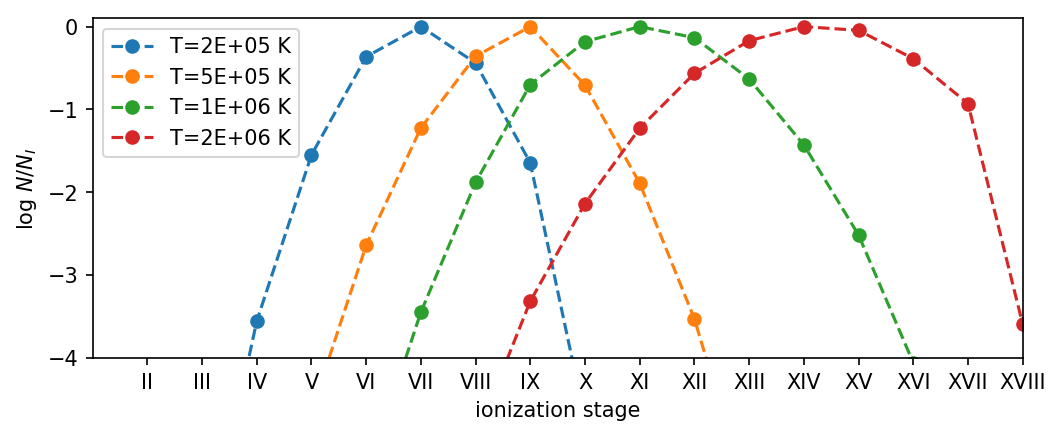

In [424]:
Z = 26   # mission fail!
Z = np.arange(len(chi_erg)) + 1 # <==  26

nn=len(chi_erg)
fig, ax = plt.subplots(1,1, figsize=(8,3), dpi=150)
for t in [2.5E5, 5E5, 1E6, 2E6]:
    temp = densityRatio(chi_erg, t, Z)
    temp = temp.cumprod()
    temp /= temp.max()
    ax.plot(np.arange(2,nn+2), np.log10(temp), "--o", label="T={0:1.0E} K".format(t))

ax.set_ylim(-4, 0.1)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels[1:18])
ax.set_xlim(1,18)
ax.set_ylabel("log $N/N_I$")
ax.set_xlabel("ionization stage")
ax.legend(loc="upper left");


# Fe ionization in LTE,  Saha 

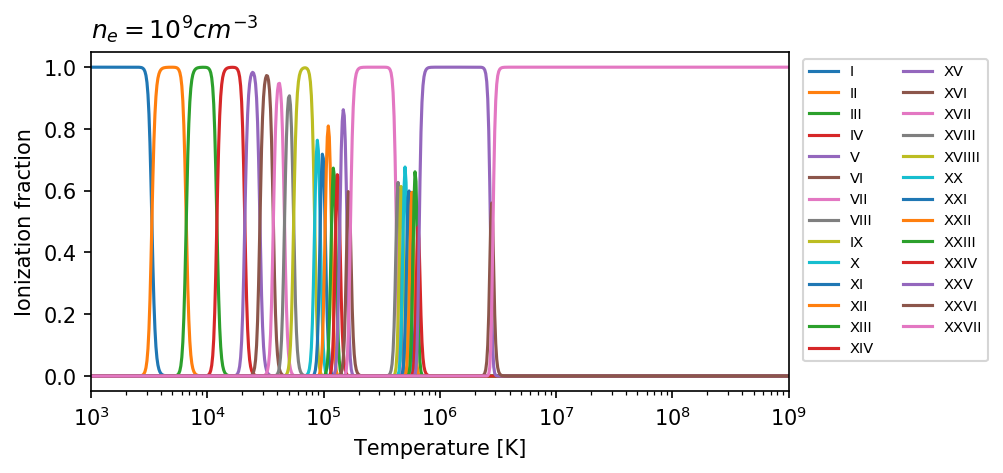

In [400]:
#--------------------------------------------------------------------------
# plot population of Fe ions against T under thermal equilibrium
#  use General.Saha_distribution() and ionization energies of Fe above
#--------------------------------------------------------------------------
from src.Atomic import LTELib, ColExcite, SEsolver
n_e = 1e9                    # electron density, cm-3
T = np.logspace(3, 9, 701)     # temperature in K,  10^3 - 10^8 K
ni = chi_erg.shape[0]+1
nT = T.shape[0]
ri = np.zeros([nT,ni])
ri[:,0] = 1.
for i in range(nT):
    for j in range(ni-1):
        ri[i,j+1] = LTELib.Saha_distribution(1,1,chi_erg[j],n_e,T[i])*ri[i,j]
        ri[i,:] = ri[i,:]/np.sum(ri[i,:])

fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=150)
for i in range(ni):
    #ax.plot(T,ri[:,j],label=f"{i} ")
    ax.plot(T,ri[:,i],label=xticklabels[i])
ax.set_xlabel("Temperature [K]")
ax.set_xscale("log")
ax.set_xlim(1e3, 1e9) 
ax.set_ylabel("Ionization fraction")
plt.title('$n_e = 10^9 cm^{-3}$',loc='left',fontsize=12)
#ax.set_yscale("log")
#ax.set_ylim(1e-10, 2) 
#ax.legend(loc="upper right",fontsize=7,ncol=2)
ax.legend(bbox_to_anchor=(1.01,1),fontsize=7,ncol=2)

# Coronal equiliblium;   
 Collisional ionization = radiative recombination

$$
\frac{n_c}{n_i} = \frac{3^{3/2} c^3 h^3 C_{nl} kT}{2^6 \pi^3 e^6 Z^4 \chi} e^{-\chi/{kT}} \frac{1}{E(\frac{\chi}{kT})} ; \quad C_{nl}=0.15, \quad E(x) = e^x \int_{x}^{\infty}{\frac{e^{-t}}{t}dt}
     \qquad \rm{(Miyamoto   1949)}
$$　　


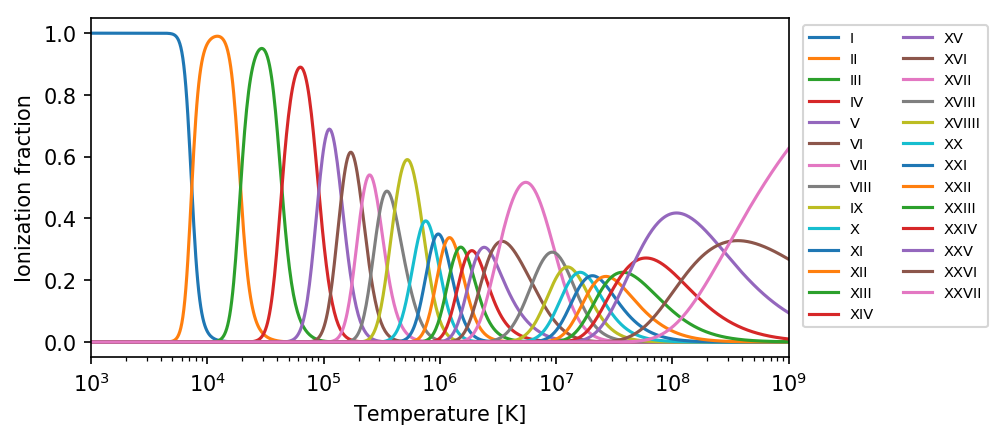

In [401]:
#--------------------------------------------------------------------------
# plot population of Fe ions against T under the equilibrium of
#     << collisional ionization = radiative recombination >>
#  use the following function nc_ni_Ratio() for n_(i+1)/n_i
#--------------------------------------------------------------------------
from scipy.integrate import quad

def nc_ni_Ratio(chi1,T1,Z):
    nume = 3**1.5 * Cst.c_**3 * Cst.h_**3 * 0.15 * Cst.k_ * T1 
    denom = 2**6 * np.pi**3 * Cst.e_**6 * Z**4 * chi1
    x = chi1/(Cst.k_ * T1)
    #Ex = np.exp(x) * quad(integrand, x, np.inf)[0]
    #r = nume/denom * np.exp(-x) / E(x)
    r = nume/denom * np.exp(-x) / E(x)
    #r = nume/denom * quad(integrand, x, np.inf)[0]
    #from IPython.core.debugger import Pdb; Pdb().set_trace()
    return r
#--------------------------------------------------------------------------
Z = np.arange(len(chi_erg)) + 1 # 26
T = np.logspace(3, 9, 701)     # temperature in K,  10^3 - 10^8 K
ni = chi_erg.shape[0]+1
nT = T.shape[0]
ab = np.zeros([nT,ni])  #  ion 0-26
ab[:,0] = 1.
   
nume0 = 3**1.5 * Cst.c_**3 * Cst.h_**3 * 0.15 * Cst.k_ 
denom0 = 2**6 * np.pi**3 * Cst.e_**6 
for j in range(nT):    #  T
#for j in range(200,201):    #  T
    T1=T[j]
    #print("T=",T1)
    ri = densityRatio(chi_erg, T1, Z)
    cri = np.concatenate([[1],ri.cumprod()])
    cri = cri / np.sum(cri)
    #for i in range(0,ni-1): print(i,cri[i])
    #ax.plot(np.arange(2,nn+2), np.log10(temp), "--o", label="T={0:1.0E} K".format(t))
    #ri[j,:] = ri[i,:]/np.sum(ri[i,:])
    ab[j,:] = cri
    
fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=150)
for i in range(ni):
    ax.plot(T,ab[:,i],label=xticklabels[i])
ax.set_xlabel("Temperature [K]")
ax.set_xscale("log")
ax.set_xlim(1e3, 1e9) 
ax.set_ylabel("Ionization fraction")
#plt.title('$n_e = 10^9 cm^{-3}$',loc='left',fontsize=12)
#ax.set_yscale("log")
#ax.set_ylim(1e-10, 2) 
ax.legend(bbox_to_anchor=(1.01,1),fontsize=7,ncol=2)

D:\Users\ichimoto\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
D:\Users\ichimoto\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


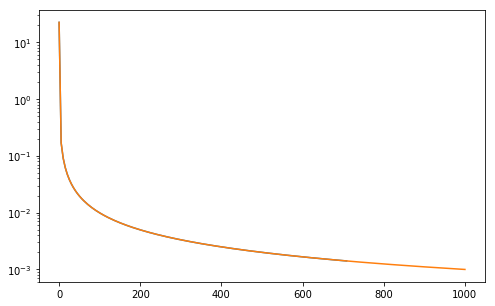

In [404]:
#  test E() function

#----------  overflow  ---
def integrand0(t):
    return np.exp(-t)/t

def E0(x):
    return  np.exp(x) * quad(integrand0, x, np.inf)[0]

#----------  ok
def integrand(t,x):
    return np.exp(x-t)/t

def E(x):
    return quad(integrand, x, np.inf, x)[0]
    
#-----------------------
fig, ax = plt.subplots(1,1, figsize=(8,5))#, dpi=150)

x=np.linspace(1e-10,1000,200)

nn=len(x)
y1=np.zeros(nn)
y2=np.zeros(nn)
for i in range(0,nn):
    x1=x[i]
    y1[i] = E0(x1)
    y2[i] = E(x1)
    
    #y1[i] = quad(integr, x1, np.inf, x1)[0]
    #print( quad(integr, x1, np.inf, x1)[0])

ax.plot(x,y1)
ax.plot(x,y2)
ax.set_yscale("log")
